In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
data =pd.read_csv("Churn (1) (1).csv")

# Exploratory Data Analysis (EDA):

In [52]:
data.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [53]:
data.drop('Unnamed: 0',axis=1,inplace = True)

In [54]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [55]:
data['day.charge']=data['day.charge'].astype(float)
data['eve.mins']=data['eve.mins'].astype(float)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [57]:
data.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [58]:
data.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [59]:
numerical_columns = data.select_dtypes(include=['float64','int64']).columns
numerical_columns

Index(['account.length', 'voice.messages', 'intl.mins', 'intl.calls',
       'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins',
       'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls'],
      dtype='object')

In [92]:
for column in numerical_columns:
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=data[(data[column]<lower_bound)|(data[column]>upper_bound)]
    if len(outliers):
        print(f'Outliers in the column {column} :')
        print(outliers[[column]])

Outliers in the column account.length :
      account.length
238              215
309              209
416              224
817              243
1093             210
1387             212
1408             232
1551             225
1751             225
1886             224
2150             212
2259             210
2277             217
2700             209
3216             221
3227             209
4260             238
4342             216
4389             232
4395             233
4629             217
4798             222
Outliers in the column voice.messages :
      voice.messages
71                46
149               43
268               48
277               48
423               45
599               46
615               43
790               45
845               51
872               43
1378              43
1441              47
1454              44
1487              44
1596              49
1602              44
1732              43
1797              47
1846              43
1908             

In [61]:
data=data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [62]:
data.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4594.000000,4578.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,100.203434,7.772658,10.265920,4.449033,2.772313,180.140078,99.988481,30.628505,200.573678,100.138883,17.054927,200.597327,100.057161,9.026981,1.311671
std,39.815994,13.550984,2.770301,2.470623,0.747898,53.905866,19.772952,9.168628,50.793540,19.803756,4.317222,50.554291,19.905505,2.274972,0.973906
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,165.925000,87.000000,14.130000,167.200000,87.000000,7.520000,1.000000
50%,100.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,200.900000,100.000000,17.080000,200.500000,100.000000,9.020000,1.000000
75%,127.000000,17.000000,12.000000,6.000000,3.240000,216.000000,113.000000,36.720000,234.475000,113.000000,19.930000,235.000000,113.000000,10.580000,2.000000
max,243.000000,52.000000,20.000000,20.000000,5.400000,351.500000,163.000000,59.760000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,3.000000


# Visualizing Distributions

<function matplotlib.pyplot.show(close=None, block=None)>

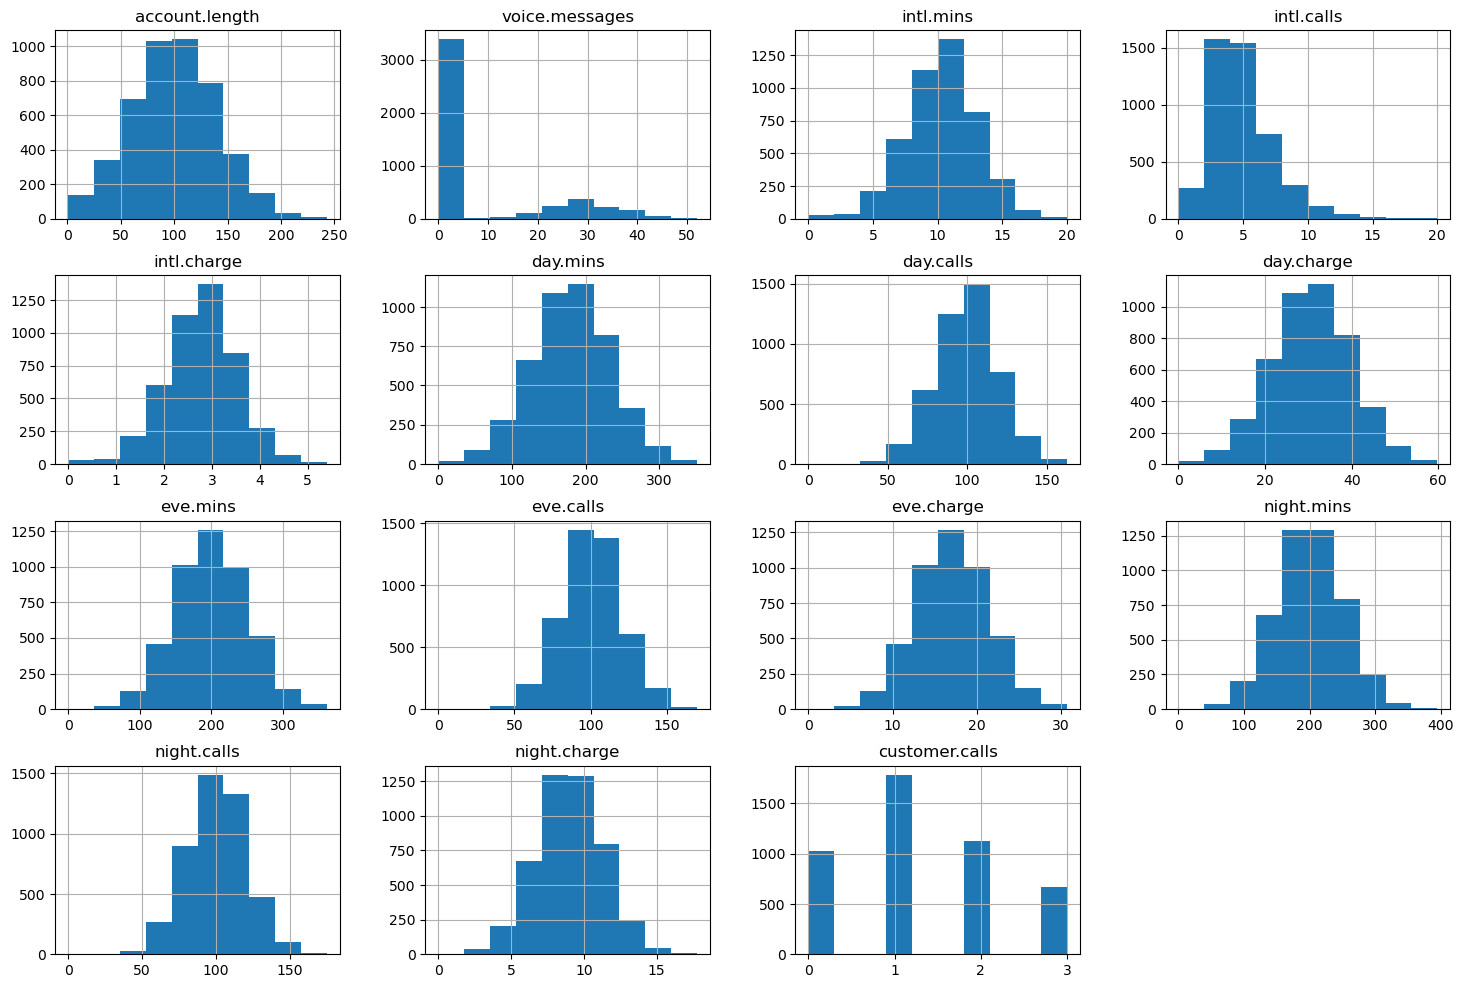

In [63]:
data.hist(figsize=(18,12))
plt.show

<Axes: >

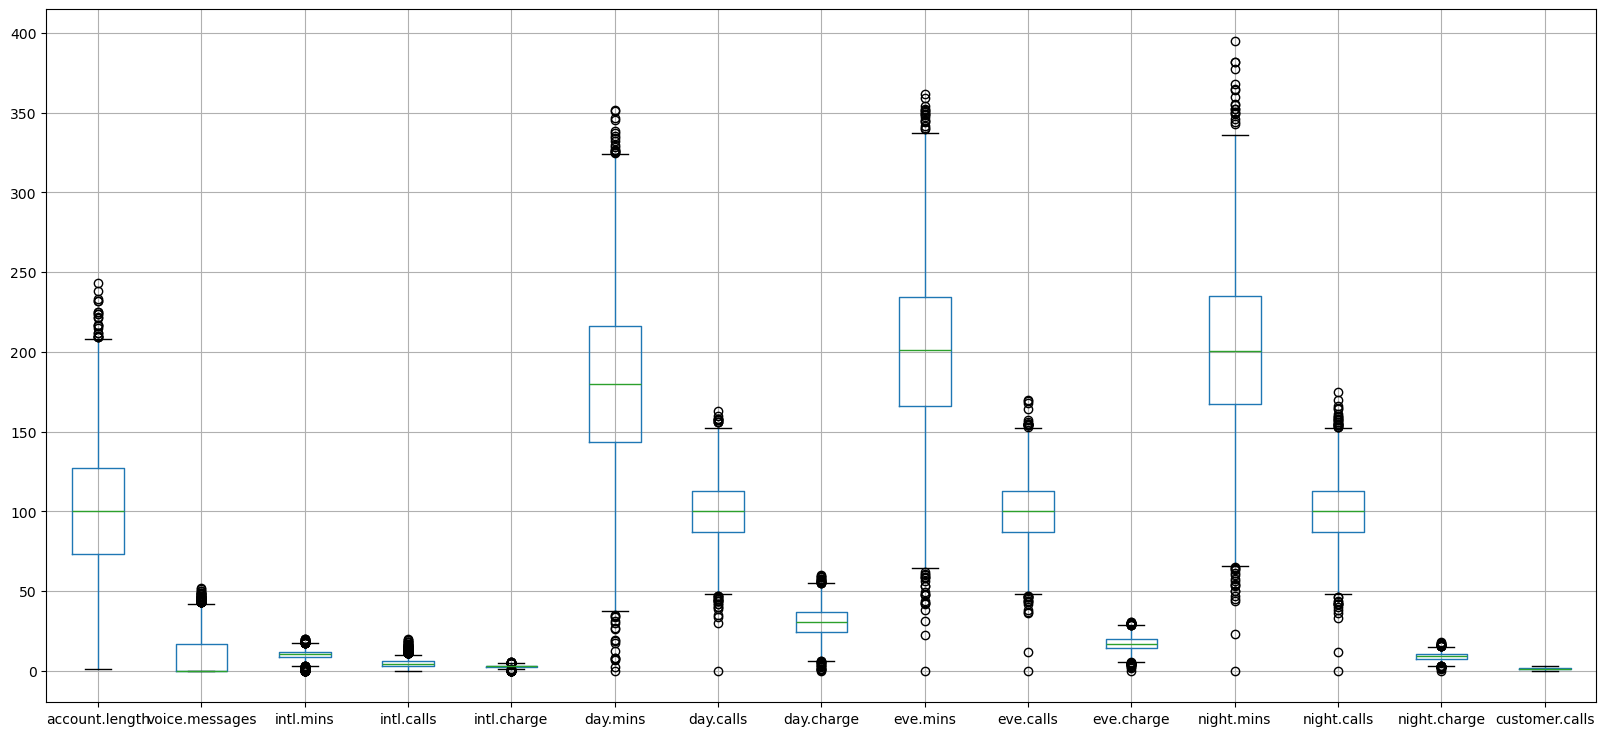

In [81]:
data.boxplot(figsize=(20,9))

array([[<Axes: title={'center': 'intl.mins'}>,
        <Axes: title={'center': 'intl.calls'}>]], dtype=object)

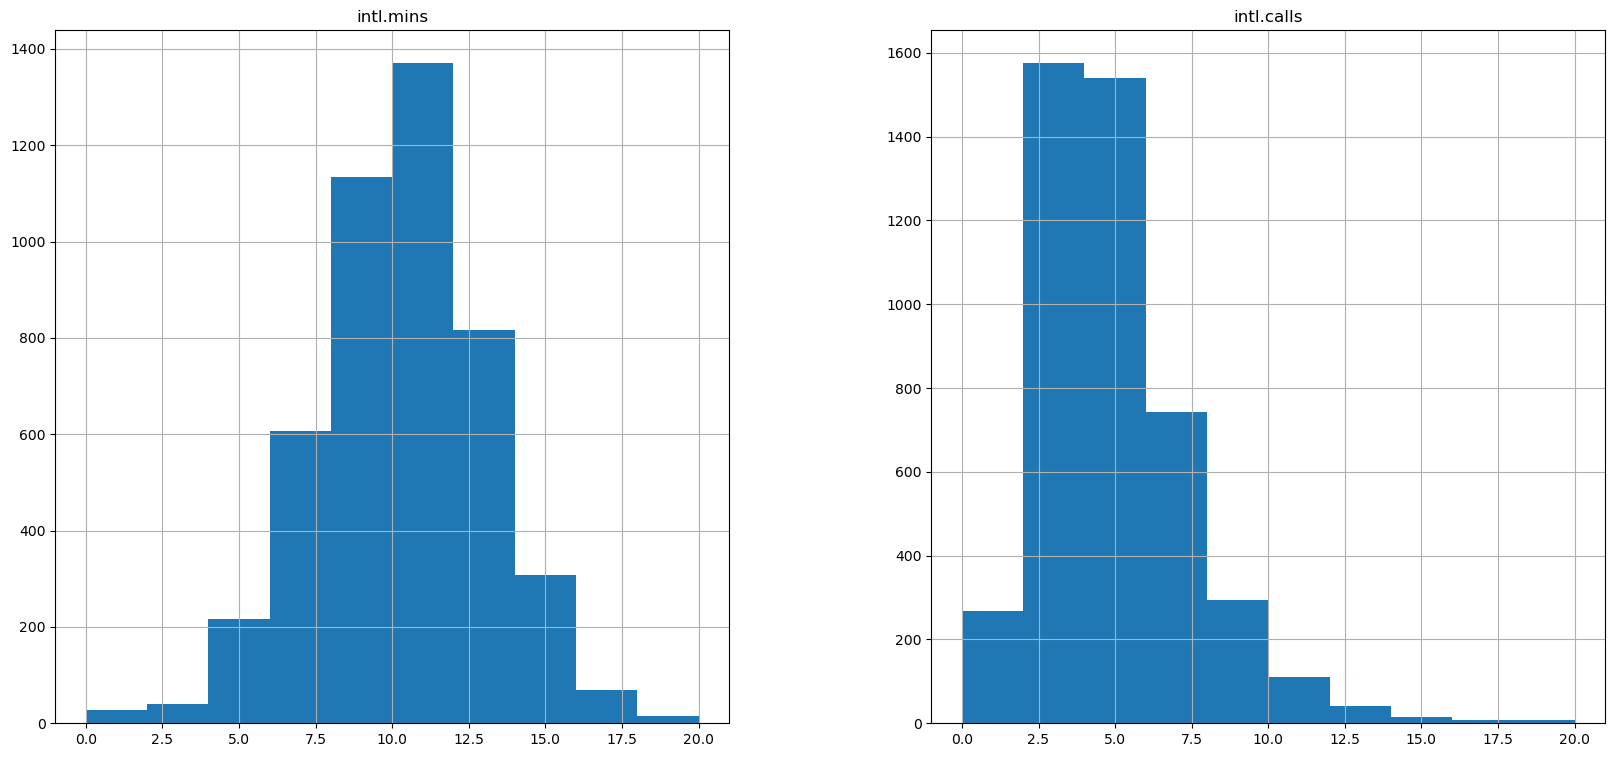

In [86]:
data.hist(['intl.mins','intl.calls'],figsize=(20,9),grid="none")

<Axes: xlabel='intl.calls', ylabel='Count'>

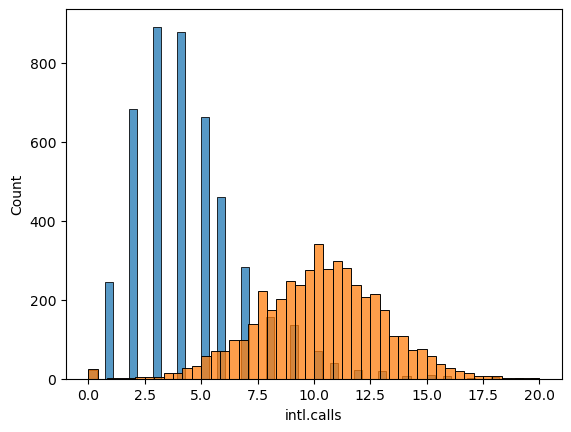

In [93]:
sns.histplot(data['intl.calls'])
sns.histplot(data['intl.mins'])

<Axes: xlabel='intl.mins', ylabel='Count'>

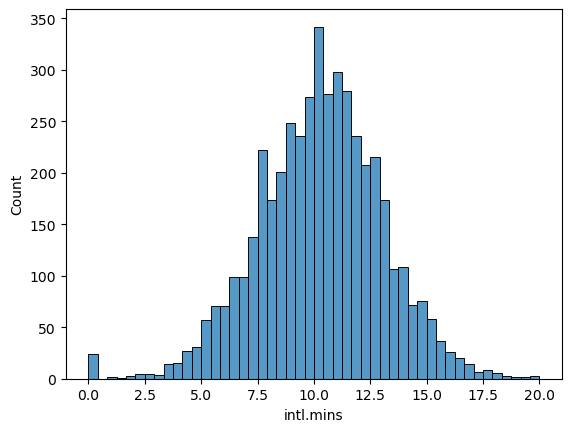

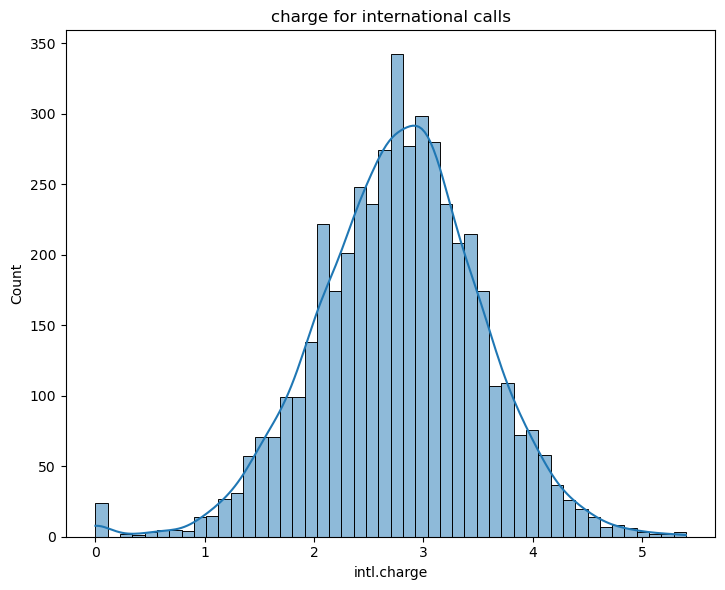

In [75]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data['intl.charge'],kde=True,)
plt.title('charge for international calls')
plt.tight_layout()
plt.show()